In [1]:
# Some IPython magic
# Put these at the top of every notebook, here nbagg is used for interactive plots
%reload_ext autoreload
%autoreload 2
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# set floating points write format
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})


In [2]:
def plot_decision_boundary(model, X, y):
    """
    Use this to plot the decision boundary of a trained model.
    """

    xx, yy = np.mgrid[0:1:.01, 0:1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                vmin=0, vmax=1)

    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    ax.scatter(X.values[:,0], X.values[:, 1], c=y, s=50,
        cmap="RdBu", vmin=-.2, vmax=1.2,
        edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
    xlim=(-0.25, 1.25), ylim=(-.25, 1.25),
    xlabel="$X_1$", ylabel="$X_2$")

In [3]:
def countsForFeature(data, feature, plot = True):
    counts = data.groupby(feature)[feature].count()
    if plot :
        fig = plt.figure()
        plt.hist(counts, range = (counts.values.min(), counts.values.max()))
        plt.show()
    else :
        return counts

# countsForFeature(data, 'Owner Name')


In [4]:
data = pd.read_csv('Ghidoveanu_A_Mihai_train.csv')
# print(list(data)) # see all features

all_classes = list(data['Breed Name'].unique())
print("=======Some examples from data===")
print(data.head())
print("\n=====Columns info=======")
print(data.info())

#oberserve how balanced is the data set
print("\n=====Summary Statistics=====")
print(data.describe())
print("\n=====Classes distribution=============")
print(data.groupby('Breed Name')['Breed Name'].count())

=======Some examples from data===
   Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Pit Bull  20371.9080     46.5317         13.0990          med   
1     Samoyed  25082.7272     54.3611         11.0180          low   
2  Bloodhound  52773.5063         NaN          7.9583          low   
3     Samoyed  23056.6890     52.3011         11.2407          med   
4    Pit Bull  27245.2525         NaN         12.4894          med   

  Attention Needs Coat Lenght     Sex Owner Name  
0            high       short    male      Aaron  
1            high         med  female   Phillips  
2            high       short  female     Wright  
3            high         med  female   Anderson  
4            high       short    male       Best  

=====Columns info=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Breed Name         1000 non-null object
Weight(g)          1000 non-null float64
Height(cm)         818 non-

## Data Info

We see that we have some missing values on the Height feature to deal with.
Fortunately enough, we have a balanced data set with samples from each class in approximately equal amounts

In [5]:
## CHECK MISSING VALUES
# we check if we have missing values in form on NaN or space or zero entries where they shouldn't be
def any_df(df):
    checked = df.any()[lambda x : x]
    if checked.count() != 0:
        return list(checked.keys())
    else:
        return False
    if any(df.sum() != 0) :
        return True
    else :
        return False

conditions = {
    "innapropiate zero entries" : lambda : data == 0,
    "innapropiate empty string entries" : lambda : data == ' ',
    "NaN entries" : lambda : data.isna()
}

columns_with_missing = []
for key, value in conditions.items():
    df_func = value
    checked = any_df(df_func())
    print("Dataset has {} : {}".format(key, checked))
    if checked != False : 
        columns_with_missing += checked

print("Columns with missing values : ", columns_with_missing)

Dataset has innapropiate zero entries : False
Dataset has innapropiate empty string entries : False
Dataset has NaN entries : ['Height(cm)']
Columns with missing values :  ['Height(cm)']


## Data formatting

+ 'Sex' feature will be one-hot encoded because its categories don't have a certain order.
+ Unlike it, all the other categorical feature have an innate ordering and distance, so we use ordinal encoders for them e.g. high is closer to medium than to lower


In [6]:
## DATA FORMATTING

# preformat features
from sklearn import preprocessing
# all_features = ['Breed Name','Weight(g)','Height(cm)', 'Longevity(yrs)', 'Energy level', 
# 'Attention Needs', 'Coat Lenght', 'Sex', 'Owner Name']
ordinal_features = ['Energy level' , 'Attention Needs', 'Coat Lenght', 'Owner Name', 'Breed Name']
onehot_features = ['Sex']

# encoding ordinal features
ordinalEnc = preprocessing.OrdinalEncoder()
ordinalEnc.fit(data[ordinal_features])
data[ordinal_features] = ordinalEnc.transform(data[ordinal_features])

# encoding one hot features
data = pd.get_dummies(data, prefix = ['is'], columns = onehot_features)



## Plots of data

Two of the classes are prety mangled in their continous attributes

<IPython.core.display.Javascript object>


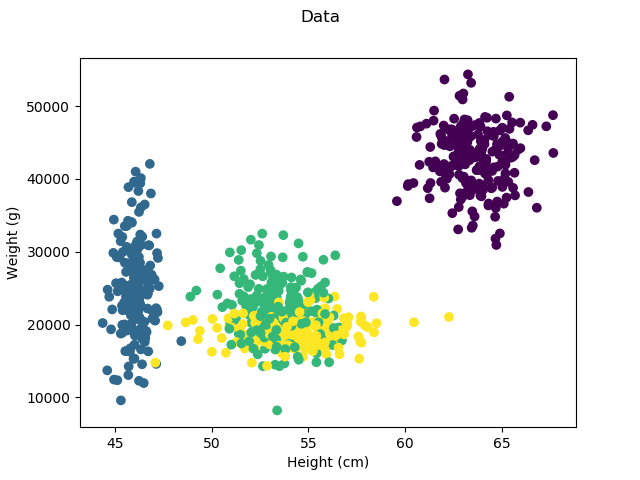

Text(0,0.5,'Weight (g)')

In [7]:
plot_features = ['Height(cm)', 'Weight(g)']
x_plot = data[plot_features]
y_plot = data['Breed Name']
fig = plt.figure()
plt.scatter(x_plot['Height(cm)'], x_plot['Weight(g)'],c =  y_plot)
fig.suptitle("Data")
plt.xlabel('Height (cm)')
plt.ylabel('Weight (g)')

<IPython.core.display.Javascript object>


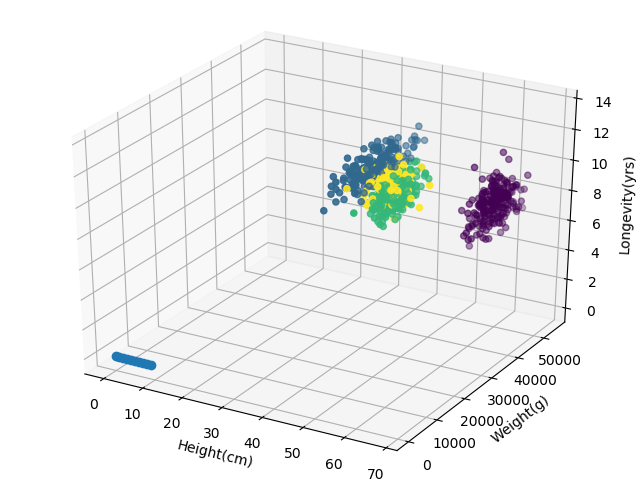

Text(0.5,0,'Longevity(yrs)')

In [8]:
## Plot data 

from mpl_toolkits.mplot3d import Axes3D
# all_features = ['Breed Name','Weight(g)','Height(cm)', 'Longevity(yrs)', 'Energy level', 
# 'Attention Needs', 'Coat Lenght', 'Sex', 'Owner Name']
plot_features = ['Height(cm)', 'Weight(g)', 'Longevity(yrs)']
x_plot = data[plot_features]
y_plot = data['Breed Name']

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_plot.iloc[:,0], x_plot.iloc[:,1], x_plot.iloc[:,2], c=y_plot, marker='o')

ax.set_xlabel(plot_features[0])
ax.set_ylabel(plot_features[1])
ax.set_zlabel(plot_features[2])

In [9]:
#scale all current features
scale_features = list(data)
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data[scale_features] = scaler.transform(data[scale_features])

D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

RSTATE = 42

def classify(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = RSTATE)
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
#     dtc = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    rfc = RandomForestClassifier(n_estimators = 10)

    clfs = [lr, knn, rfc]
    scores = []
    for clf in clfs:
        clf.fit(x_train, y_train)
        scores.append(clf.score(x_test,y_test))
    #     plot_decision_boundary(model,x_test,y_test)
    return scores


def regress(X ,Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = RSTATE)
    ridge = Ridge()
    knnr = KNeighborsRegressor()

    regs = [ridge, knnr]
    scores = []
    for reg in regs:
        reg.fit(x_train, y_train)
        scores.append(reg.score(x_test,y_test))
    return scores

In [11]:
from sklearn import impute

def features_labels_split(df):
    breed = pd.factorize(df['Breed Name'])[0]
    longevity = df['Longevity(yrs)']
    input_data = df.drop(['Breed Name', 'Longevity(yrs)'], axis = 1)
    return input_data, breed, longevity

# extracting the columns that will act as labels for our data
input_data, y_clas, y_reg = features_labels_split(data)
all_features = list(input_data)

strategies = ['mean', 'median', 'most_frequent']
# try accuracies for all strategies of replacing missing values
for stg in strategies:
    imp = impute.SimpleImputer(missing_values = np.nan, strategy = stg)
    X = imp.fit_transform(input_data)
    print("Strategy : ", stg)
    print("Clasificare : ", classify(X, y_clas))
    print("Regresie : ", regress(X, y_reg))
    

X, y_clas, y_reg = features_labels_split(data.dropna())

# try accuracy for dropping missing values
print("Strategy : Drop all missing")
print("Clasificare : ", classify(X, y_clas))
print("Regresie : ", regress(X, y_reg))

### Conclusion : we drop the missing values entries, given that we gain more accuracy this way        

Strategy :  mean
Clasificare :  [0.8733333333333333, 0.8733333333333333, 0.9233333333333333]
Regresie :  [0.6808119490748998, 0.6976064155111383]
Strategy :  median
Clasificare :  [0.8733333333333333, 0.8733333333333333, 0.9033333333333333]
Regresie :  [0.6802858545062878, 0.6917636429355876]
Strategy :  most_frequent
Clasificare :  [0.8833333333333333, 0.86, 0.92]
Regresie :  [0.6773205096619765, 0.6729680549835924]
Strategy : Drop all missing
Clasificare :  [0.8943089430894309, 0.8861788617886179, 0.9105691056910569]
Regresie :  [0.7614105407355944, 0.7707688252834031]


In [12]:
## TUNING Logistic Regression

from sklearn.model_selection import KFold

kf = KFold(n_splits = 4, random_state = RSTATE)
def cross_validate(X, Y, model, kf = kf):
    scores = []
    for train, test in kf.split(X, Y):
        model.fit(X.iloc[train], Y[train])
        scores.append(model.score(X.iloc[test], Y[test]))
    return ( np.mean(scores), np.std(scores) )


x_train, x_test, y_train, y_test = train_test_split(X, y_clas, test_size = 0.3, random_state = RSTATE)
clf = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial',C = 4, max_iter = 300)

def try_regularize(clf,c_regs):
    mean_errs = []
    for c in c_regs:
        # lbfgs and multinomial gave the best results
        clf.C = c
        mean_err, _ = cross_validate(x_train, y_train, clf)
        mean_errs.append(mean_err)
    return mean_errs

def try_solvers(clf, solvers):
    mean_errs = []
    for solver in solvers:
        if solver == 'liblinear':
            clf.multi_class = 'ovr'
        else:
            clf.multi_class = 'multinomial'
        clf.solver = solver
        mean_err, _ = cross_validate(x_train, y_train, clf)
        mean_errs.append(mean_err)
    return mean_errs

# try many regularizations
c_regs = np.arange(0.01, 10, 1)
r_errs = try_regularize(clf,c_regs)

#try many solvers
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']
s_errs = try_solvers(clf, solvers)

plt.plot(c_regs, r_errs, 'o-')
max_solver = np.argmax(s_errs)
print("Max solvers : {} : {}".format(solvers[max_solver], s_errs[max_solver]))
        
## Conclusion : we will keep c = 4, given that not much change in accuracy will be registered then 
## Conclusion : keep the newton-cg solver, cause it has the best accuracy
clf.C = 4
clf.solver = 'newton-cg'
clf.multi_class = 'multinomial'

clf.fit(x_train, y_train)
print("Test error : %.3f " % clf.score(x_test, y_test))

Max solvers : newton-cg : 0.9493006993006993
Test error : 0.923 


In [13]:
!conda install python-graphviz
# !pip install graphviz
# !apt install graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [14]:
import graphviz

In [15]:
## TUNING Decision Tree 
from sklearn import tree

# checking many max_depth values -- currently between 3 and 4 
# we choose min_samples_leaf = 1 because we tackle a classification problem
# because max_depth is pretty small, we let the tree split on any sample number ??? / try more values
# maybe perform dimensionality reduction
clf = DecisionTreeClassifier(random_state=RSTATE, max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, criterion = 'gini')

validation_score, std = cross_validate(x_train, y_train, clf) # train with cross validation
print("Validation error : {:.3f} +- {:.3f}".format(validation_score, std))

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names= all_features,  
                         class_names= all_classes,  
                         filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

print("Test error : %f " % clf.score(x_test, y_test))

Validation error : 0.962 +- 0.021
Test error : 0.930894 


In [16]:
## TUNING RANDOM FOREST 

# try more n_estimators and pick the best one
# check some values for max_depth 
clf = RandomForestClassifier(random_state =RSTATE, n_estimators=100 )

validation_score, std = cross_validate(x_train, y_train, clf) # train with cross validation
print("Validation error : {:.3f} +- {:.3f}".format(validation_score, std))

dt = clf.estimators_[0]
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names= all_features,  
                     class_names= all_classes,  
                     filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
# graph

print("Test error : %f " % clf.score(x_test, y_test))

Validation error : 0.962 +- 0.014
Test error : 0.939024 


In [17]:
## TUNING KNN Classifier

# try more n_neighbors and 
clf = KNeighborsClassifier(n_neighbors=5)

validation_score, std = cross_validate(x_train, y_train, clf) # train with cross validation
print("Validation error : {:.3f} +- {:.3f}".format(validation_score, std))
 
# graph

print("Test error : %f " % clf.score(x_test, y_test))

Validation error : 0.897 +- 0.016
Test error : 0.878049 


In [18]:
## TUNING LINEAR REGRESSION - RIDGE

reg = Ridge()

validation_score, std = cross_validate(x_train, y_train, reg) # train with cross validation
print("Validation error : {:.3f} +- {:.3f}".format(validation_score, std))
 
# graph

print("Test error : %f " % reg.score(x_test, y_test))


Validation error : 0.772 +- 0.028
Test error : 0.713653 


In [19]:
## TUNING LINEAR REGRESSION - LASSO
from sklearn.linear_model import Lasso


reg = Lasso()

validation_score, std = cross_validate(x_train, y_train, reg) # train with cross validation
print("Validation error : {:.3f} +- {:.3f}".format(validation_score, std))
 
# graph

print("Test error : %f " % reg.score(x_test, y_test))


Validation error : -0.005 +- 0.005
Test error : -0.046785 
